[*********************100%***********************]  3 of 3 completed


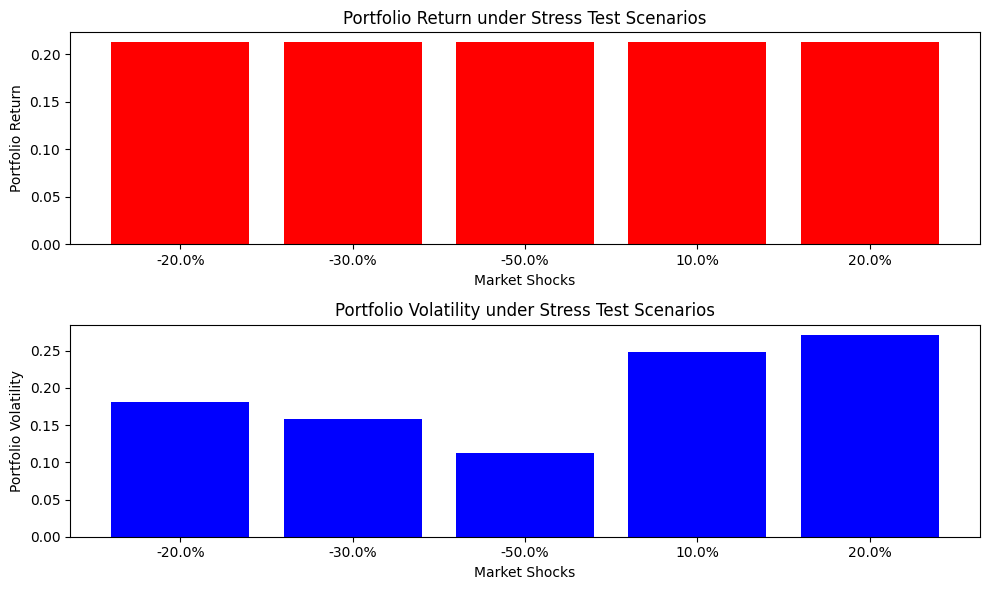

Market Shock: -20.0%
Portfolio Return: 0.2126
Portfolio Volatility: 0.1808
----------------------------------------
Market Shock: -30.0%
Portfolio Return: 0.2126
Portfolio Volatility: 0.1582
----------------------------------------
Market Shock: -50.0%
Portfolio Return: 0.2126
Portfolio Volatility: 0.1130
----------------------------------------
Market Shock: 10.0%
Portfolio Return: 0.2126
Portfolio Volatility: 0.2486
----------------------------------------
Market Shock: 20.0%
Portfolio Return: 0.2126
Portfolio Volatility: 0.2712
----------------------------------------


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


# Fetch historical data for TSLA, BND, and SPY
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2024-12-31')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Calculate the expected annual return and volatility (standard deviation) for each asset
annual_returns = returns.mean() * 252  # 252 trading days in a year
annual_volatility = returns.std() * np.sqrt(252)

# Portfolio performance function
def portfolio_performance(weights, returns, volatilities):
    # Calculate portfolio return
    portfolio_return = np.sum(weights * annual_returns)
    # Calculate portfolio volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    return portfolio_return, portfolio_volatility

# Stress Testing: Simulate Market Shocks and Recessions
def stress_test_scenarios(weights, returns, shock_scenarios):
    portfolio_returns = []
    portfolio_volatility = []
    for shock in shock_scenarios:
        # Apply shock to returns
        shocked_returns = returns * (1 + shock)
        
        # Recalculate portfolio performance with shocked returns
        portfolio_return, portfolio_volatility_val = portfolio_performance(weights, shocked_returns, returns.std())
        portfolio_returns.append(portfolio_return)
        portfolio_volatility.append(portfolio_volatility_val)
    
    return portfolio_returns, portfolio_volatility

# Define stress test scenarios (shocks in returns: -20%, -30%, -50% for a market crash)
# Positive shocks could simulate a market boom (e.g., +10%, +20%)
shock_scenarios = [-0.2, -0.3, -0.5, 0.1, 0.2]

# Initial portfolio weights (equally weighted)
initial_weights = np.array([1/3, 1/3, 1/3])  # TSLA, BND, SPY

# Run stress test with scenarios
portfolio_returns, portfolio_volatility = stress_test_scenarios(initial_weights, returns, shock_scenarios)

# Plot Stress Test Results
def plot_stress_test_results(shock_scenarios, portfolio_returns, portfolio_volatility):
    plt.figure(figsize=(10, 6))
    
    # Plot portfolio returns under different shocks
    plt.subplot(2, 1, 1)
    plt.bar([str(s) + '%' for s in (np.array(shock_scenarios) * 100)], portfolio_returns, color='red')
    plt.title('Portfolio Return under Stress Test Scenarios')
    plt.ylabel('Portfolio Return')
    plt.xlabel('Market Shocks')
    
    # Plot portfolio volatility under different shocks
    plt.subplot(2, 1, 2)
    plt.bar([str(s) + '%' for s in (np.array(shock_scenarios) * 100)], portfolio_volatility, color='blue')
    plt.title('Portfolio Volatility under Stress Test Scenarios')
    plt.ylabel('Portfolio Volatility')
    plt.xlabel('Market Shocks')
    
    plt.tight_layout()
    plt.show()

# Display Stress Test Results and Visualizations
plot_stress_test_results(shock_scenarios, portfolio_returns, portfolio_volatility)

# Display portfolio performance under each scenario
for i, shock in enumerate(shock_scenarios):
    print(f"Market Shock: {shock*100}%")
    print(f"Portfolio Return: {portfolio_returns[i]:.4f}")
    print(f"Portfolio Volatility: {portfolio_volatility[i]:.4f}")
    print("-" * 40)
